In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import scipy.stats as stats
import statsmodels.formula.api as sfa
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
from sklearn.linear_model import LinearRegression,ridge_regression,LogisticRegression
lr= LinearRegression()
lor= LogisticRegression()
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [2]:
dat= pd.read_csv(r'D:\Jupyter Notebook\datasets\Life_Expectancy.csv')

dat.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [3]:
dat.describe()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,1.240000e+02,124.000000,124.000000,124.000000,124.000000,124.000000
mean,160.475806,27.637097,85.104839,2841.637097,41.733871,36.798387,86.637097,87.919355,0.819355,6866.816502,1.960604e+07,4.180645,4.373387,0.690685,13.085484,71.220968
std,101.794506,94.347510,20.839229,11517.586950,21.186385,122.248912,21.653342,19.122879,1.764127,10885.243579,4.100762e+07,4.086736,4.212797,0.168296,2.909242,8.467924
min,3.000000,0.000000,6.000000,0.000000,2.100000,0.000000,6.000000,6.000000,0.100000,5.668726,8.381000e+03,0.300000,0.200000,0.332000,5.300000,48.600000
25%,73.500000,1.000000,82.000000,0.750000,20.950000,1.000000,88.000000,89.000000,0.100000,639.799727,8.215560e+05,1.500000,1.575000,0.551500,10.875000,65.175000
50%,139.500000,10.000000,94.000000,37.000000,54.100000,12.000000,95.000000,95.000000,0.100000,2728.291765,4.234054e+06,2.400000,2.800000,0.740000,13.300000,72.200000
75%,234.000000,21.000000,97.000000,588.750000,59.750000,26.500000,98.000000,98.000000,0.400000,8437.562893,1.482767e+07,6.425000,6.425000,0.799000,15.000000,77.500000
max,438.000000,910.000000,99.000000,90387.000000,71.400000,1100.000000,99.000000,99.000000,8.100000,56554.387600,2.581621e+08,26.700000,27.300000,0.945000,20.400000,86.000000


In [4]:
dat.isnull().sum()

Country               0
Status                0
Adult_Mortality       0
Infant_Deaths         0
Hepatitis             0
Measles               0
 BMI                  0
Underfive_Deaths      0
Polio                 0
Diphtheria            0
 HIV                  0
GDP                   0
Population            0
Malnourished10_19     0
Malnourished5_9       0
Income_Index          0
Schooling             0
Expected              0
dtype: int64

In [5]:
#There are no missing values in the data.

In [6]:
dat['Status'] = le.fit_transform(dat['Status'])

In [7]:
dat['Country'] = le.fit_transform(dat['Country'])

In [8]:
dat

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,0,1,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,1,1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,2,1,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,3,1,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,4,1,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,1,37,24,95,129,15.4,38,95,95,7.1,287.931877,8991735,6.8,7.0,0.388,8.8,55.3
120,120,1,397,26,89,386,14.9,42,89,89,7.7,236.911438,8818438,6.9,7.1,0.371,8.2,53.4
121,121,1,48,29,96,1064,14.5,46,96,96,8.1,212.661949,868346,7.0,7.3,0.359,7.6,52.0
122,122,1,415,31,88,2738,14.1,50,85,88,8.0,196.597780,853625,7.2,7.4,0.343,7.2,57.0


In [9]:
# since country have so many variables we will consider dropping it

In [10]:
dat1 = dat.drop('Country',axis=1)

In [11]:
dat1 = pd.get_dummies(dat1)

In [12]:
dat1

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,1,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,1,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,1,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,1,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1,37,24,95,129,15.4,38,95,95,7.1,287.931877,8991735,6.8,7.0,0.388,8.8,55.3
120,1,397,26,89,386,14.9,42,89,89,7.7,236.911438,8818438,6.9,7.1,0.371,8.2,53.4
121,1,48,29,96,1064,14.5,46,96,96,8.1,212.661949,868346,7.0,7.3,0.359,7.6,52.0
122,1,415,31,88,2738,14.1,50,85,88,8.0,196.597780,853625,7.2,7.4,0.343,7.2,57.0


In [13]:
# NOW WE WILL CHECK THE CORRELATION HEATMAP

In [14]:
# ALSO WE WILL CHECK THE STANDARD DEVIATION

dat1.std()

Status                3.616663e-01
Adult_Mortality       1.017945e+02
Infant_Deaths         9.434751e+01
Hepatitis             2.083923e+01
Measles               1.151759e+04
 BMI                  2.118638e+01
Underfive_Deaths      1.222489e+02
Polio                 2.165334e+01
Diphtheria            1.912288e+01
 HIV                  1.764127e+00
GDP                   1.088524e+04
Population            4.100762e+07
Malnourished10_19     4.086736e+00
Malnourished5_9       4.212797e+00
Income_Index          1.682962e-01
Schooling             2.909242e+00
Expected              8.467924e+00
dtype: float64

In [15]:
# since std. dev of income index is near to 0 we will not consider it for model building.

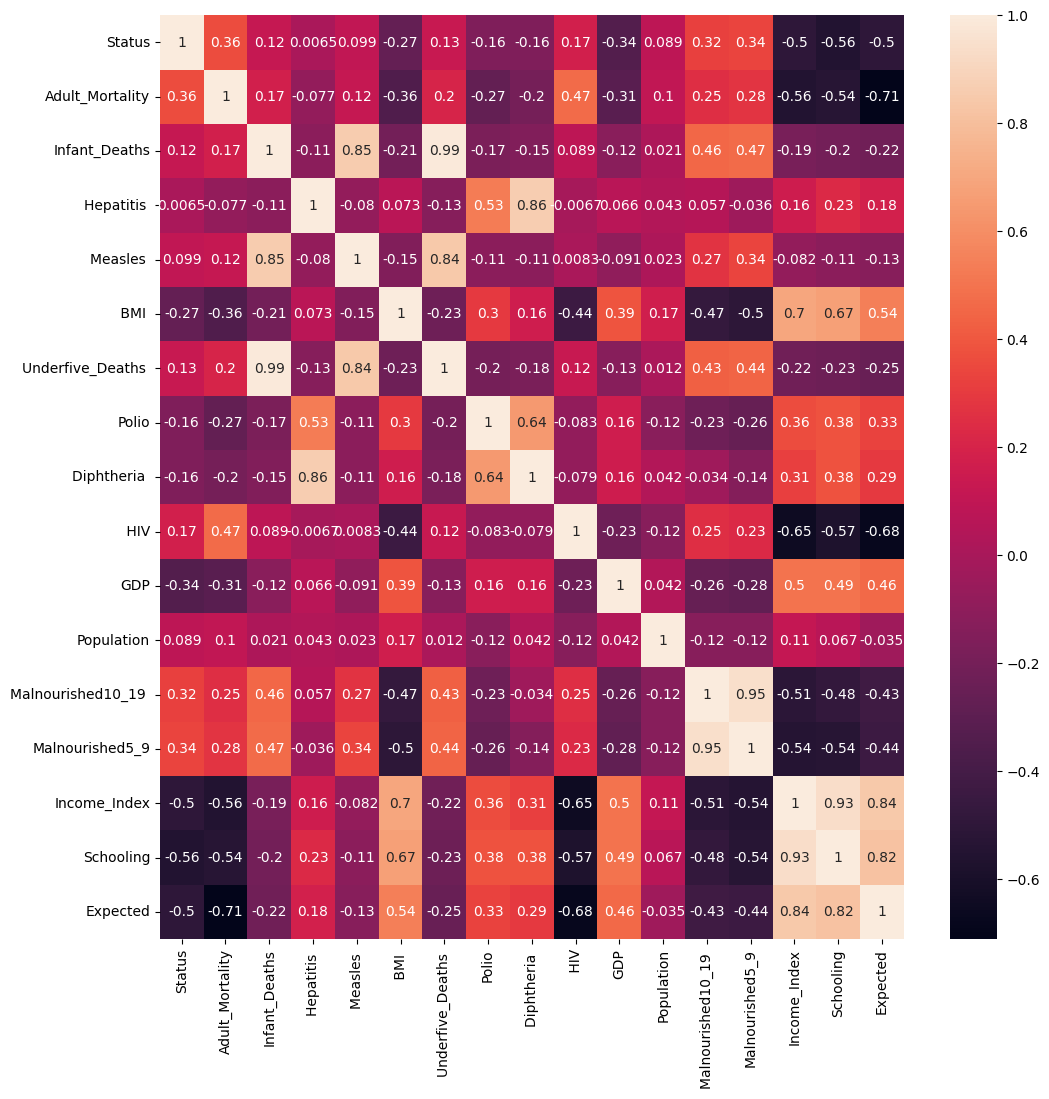

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(dat1.corr(),annot=True)
plt.show()

* model is showing income index having a strong relationship with life expectancy so we will consider it.
* we will build two models one with income and one without income so that we can later on compare what model is better and which model can strongly relate to each other

# Model without Income

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sma

In [18]:
X= dat1.drop(['Expected'],axis=1)
y= dat1.Expected
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20, random_state=0)
xtest_c= sma.add_constant(xtest)
xtrain_c= sma.add_constant(xtrain)

In [19]:
m1 = sma.OLS(ytrain,xtrain_c).fit()

In [20]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     31.36
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           2.95e-28
Time:                        15:59:20   Log-Likelihood:                -258.01
No. Observations:                  99   AIC:                             550.0
Df Residuals:                      82   BIC:                             594.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 56.3498      4.549     12.387      0.000      47.300      65.399
Status                -2.2625      1.312     -1.725      0.088      -4.872       0.347
Adult_Mortality       -0.0201      0.005     -4.455      0.000      -0.029      -0.011
Infant_Deaths          0.0556      0.041      1.367      0.175      -0.025       0.137
Hepatitis              0.0956      0.045      2.128      0.036       0.006       0.185
Measles            -8.016e-05   6.33e-05     -1.266      0.209      -0.000    4.58e-05
 BMI                  -0.0263      0.026     -1.018      0.312      -0.078       0.025
Underfive_Deaths      -0.0363      0.030     -1.214      0.228      -0.096       0.023
Polio                 -0.0253      0.026     -0.990      0.325      -0.076       0.026
Diphtheria            -0.0210      0.056     -0.374      0.709      -0.132       0.091
 HIV                  -0.9393      0.300     -3.131      0.002      -1.536      -0.343
GDP                  3.89e-05   4.05e-05      0.960      0.340   -4.17e-05       0.000
Population         -2.094e-08      1e-08     -2.094      0.039   -4.08e-08   -1.04e-09
Malnourished10_19     -0.6975      0.326     -2.140      0.035      -1.346      -0.049
Malnourished5_9        0.4712      0.310      1.522      0.132      -0.145       1.087
Income_Index          25.9173      7.411      3.497      0.001      11.173      40.661
Schooling              0.0570      0.387      0.147      0.883      -0.713       0.828
==============================================================================
Omnibus:                        4.809   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                5.998
Skew:                          -0.157   Prob(JB):                       0.0498
Kurtosis:                       4.164   Cond. No.                     9.49e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

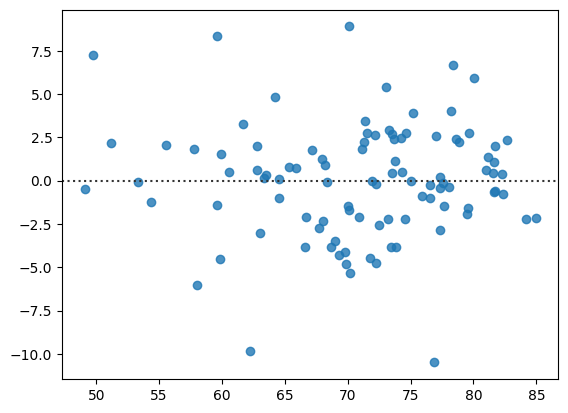

In [21]:
# PLOTTING

sns.residplot(x=m1.fittedvalues,y=m1.resid)

In [22]:
ypred_test = m1.predict(xtest_c)

In [23]:
from sklearn.metrics import recall_score,r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [24]:
def validation(fitted_model,xtrain,ytrain,xtest,ytest,ypred_test):
    y_pred_test = fitted_model.predict(xtest)
    r2 = r2_score(ytest,y_pred_test)
    print('R2:',r2)
    n = xtrain.shape[0]
    k = xtrain.shape[1]
    adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
    print('Adj R2:',adj_r2)
    print('MSE:',mean_squared_error(ytest,y_pred_test))
    print('RMSE:',np.sqrt(mean_squared_error(ytest,y_pred_test)))
    print('MAE:',mean_absolute_error(ytest,y_pred_test))
    print('MAPE:',mean_absolute_percentage_error(ytest,y_pred_test))  

In [25]:
validation(fitted_model=m1,xtrain=xtrain,ytrain=ytrain,xtest=xtest_c,ytest=ytest,ypred_test=ypred_test)

R2: 0.7129577020815796
Adj R2: 0.6569494488292049
MSE: 13.968736610144413
RMSE: 3.7374773056360375
MAE: 2.5637725323156566
MAPE: 0.03466062054876297


In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dtr = DecisionTreeRegressor()

In [28]:
m2 = dtr.fit(xtrain,ytrain)

In [29]:
ypred_test_dt= m2.predict(xtest)

In [30]:
validation(fitted_model=m2,xtrain=xtrain,ytrain=ytrain,xtest=xtest,ytest=ytest,ypred_test=ypred_test_dt)

R2: 0.45145098312556475
Adj R2: 0.3444170286134799
MSE: 26.694799999999997
RMSE: 5.166701075154242
MAE: 3.756
MAPE: 0.05261275812682173


In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rsr = RandomForestRegressor()

In [33]:
m3 = rsr.fit(xtrain,ytrain)

In [34]:
ypred_test_rsr = m3.predict(xtest)

In [35]:
validation(fitted_model=m3,xtrain=xtrain,ytrain=ytrain,xtest=xtest,ytest=ytest,ypred_test=ypred_test_rsr)

R2: 0.9016081115914256
Adj R2: 0.882409694340972
MSE: 4.78818064000001
RMSE: 2.188191179947495
MAE: 1.686720000000005
MAPE: 0.023803532228164927


In [ ]:
# Hence we can say that m3 is the best performing model out of all.